In [23]:
from datetime import datetime, timedelta
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
#import mpld3
%matplotlib inline

In [24]:
# Load it into a Dataframe using pandas
path = "data\Motor.csv"
df = pd.read_csv(path)
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2012\4080833422.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [25]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [26]:
len(df.columns)

29

In [27]:
# Check df size
df.shape

(1983443, 29)

In [38]:
# acquire the infomation about the year, month and day
df['Year'] = df['CRASH DATE'].apply(lambda x:x.split('/')[2])
df['Day'] = df['CRASH DATE'].apply(lambda x:x.split('/')[1])
df['Month'] = df['CRASH DATE'].apply(lambda x:x.split('/')[0])
df['Day']

0          11
1          26
2          29
3          11
4          14
           ..
1982507    03
1982528    19
1982570    20
1982735    01
1983007    11
Name: Day, Length: 1959136, dtype: object

In [65]:
# acquire the infomation about the hour and minute
df['Minute'] = df['CRASH TIME'].apply(lambda x:x.split(':')[1])
df['Hour'] = df['CRASH TIME'].apply(lambda x:x.split(':')[0])
df['Minute']

0          39
1          45
2          55
3          35
4          13
           ..
1982507    00
1982528    00
1982570    00
1982735    00
1983007    20
Name: Minute, Length: 1959136, dtype: object

In [29]:
# the data of 2023 is not completely.
df = df.loc[(df['Year'] < '2023')]

In [39]:
# Group crashes by frequency
# The 50 most frequent crimes
crash_freq = df['BOROUGH'].groupby(df['BOROUGH']).count().sort_values(ascending=1).reset_index(name='count')
crash_freq


,BOROUGH,count
0,STATEN ISLAND,56698
1,BRONX,198753
2,MANHATTAN,306196
3,QUEENS,361771
4,BROOKLYN,427079


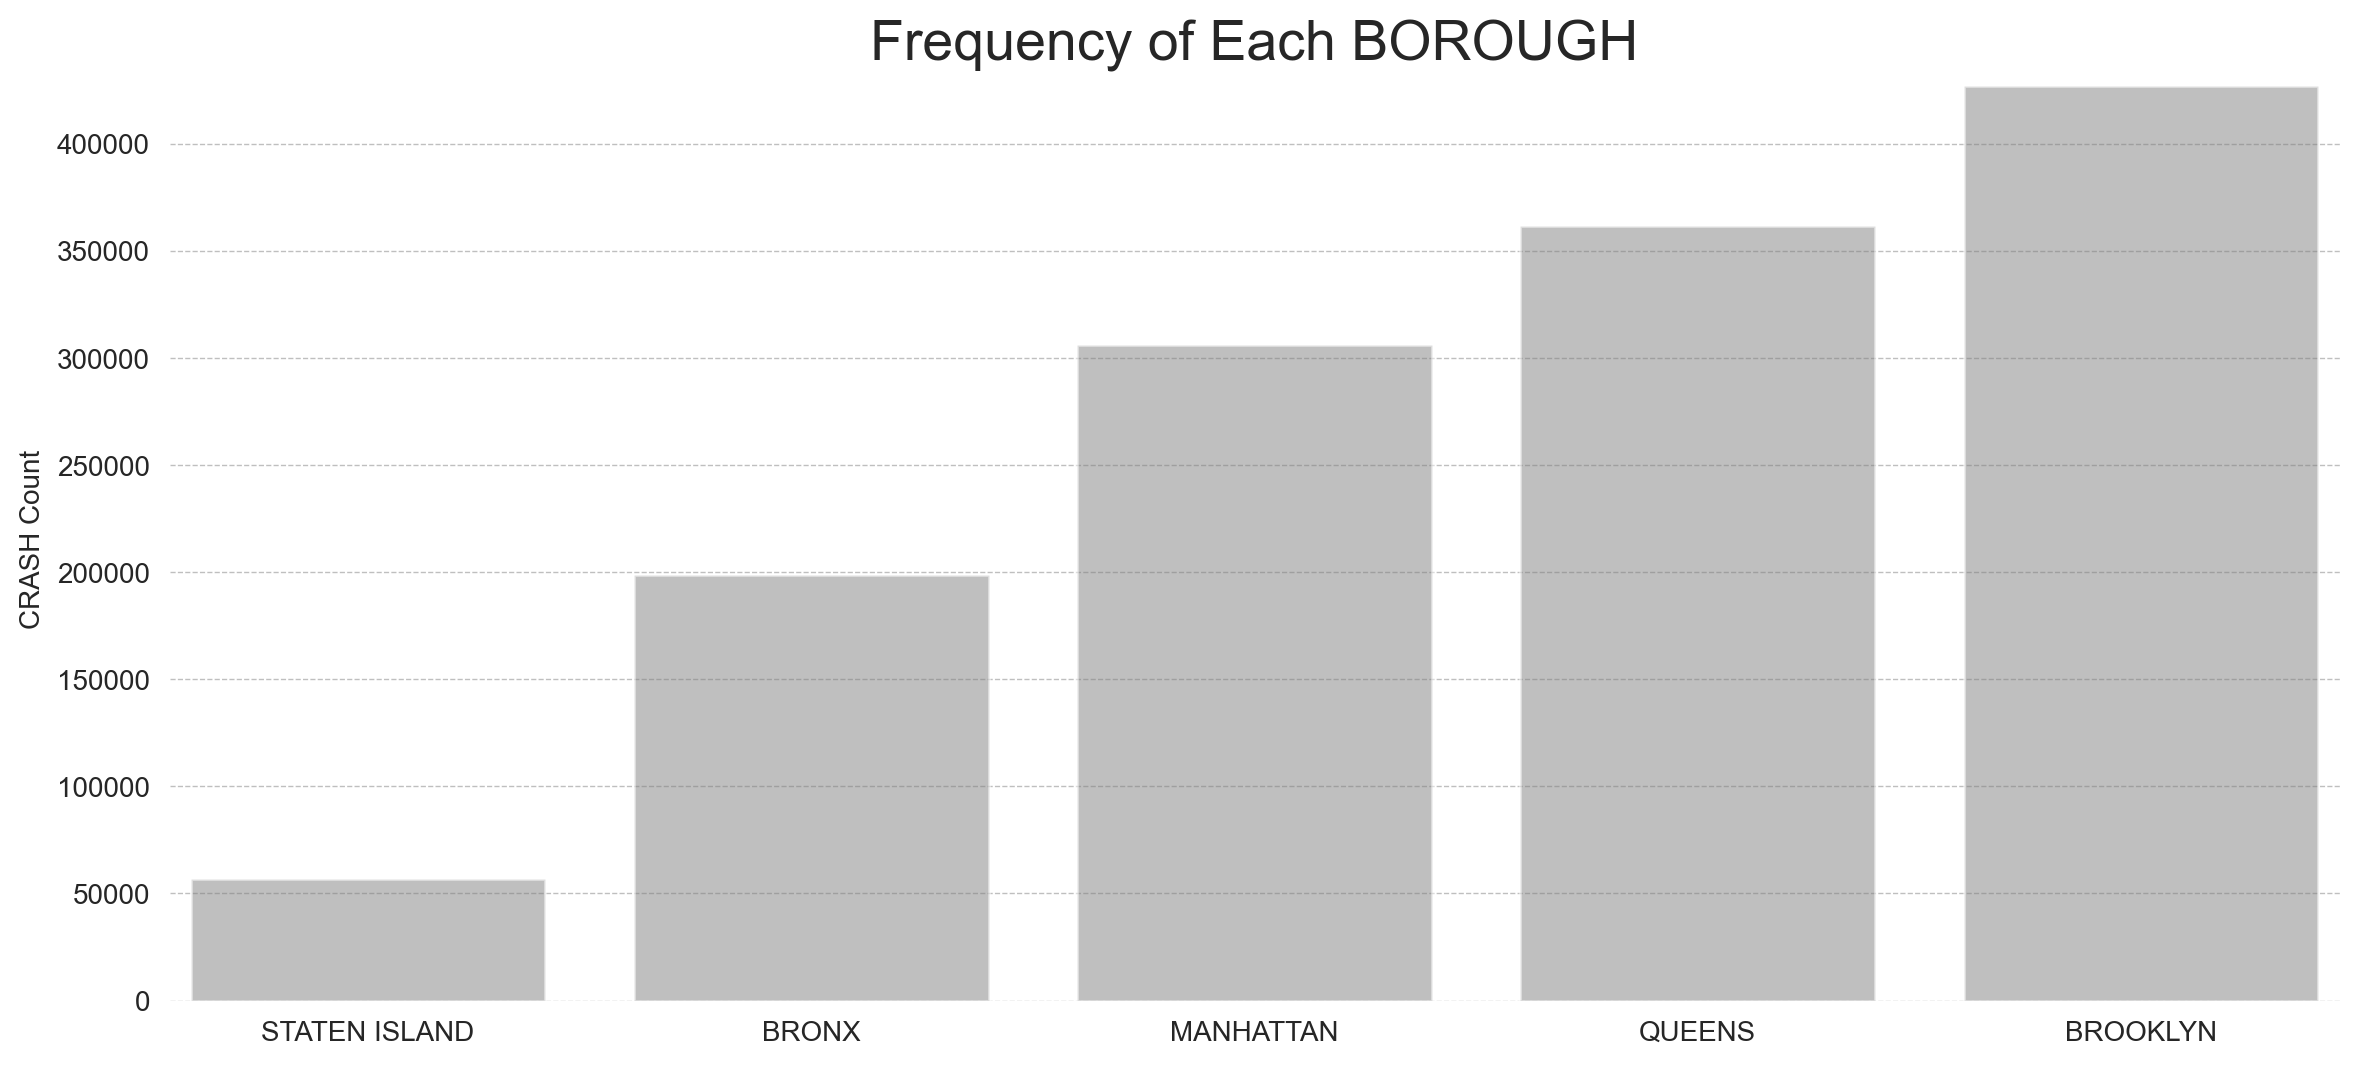

In [40]:
# Use full resolution of retina display
%config InlineBackend.figure_format = 'retina'

# use seaborn to set our graphing style. The style 'white' creates a white background for our graph
sns.set_style("white") 

# Assign x and y values
x = crash_freq['BOROUGH']
y = crash_freq['count']

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(14, 6))

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Give the x and y values to the barplot
plt.bar(x_pos, y, align='center', color='grey', alpha=.5)

# Match the indeces with the correct crash category and assign them to the x-axis
plt.yticks(np.arange(0, round(max(y),-4)+100000, 50000))
plt.xticks(x_pos, x)
plt.margins(0.01)

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

# Give labels and titles
plt.ylabel("CRASH Count")
plt.title("Frequency of Each BOROUGH",fontsize=20)

# Show the barplot
plt.show()

In [41]:
# List the number of crashs per year
crash_year_freq_time = df.groupby('Year')['Year'].count().reset_index(name='count').sort_values(by='Year', ascending=1)
crash_year_freq_time

,Year,count
0,2012,100545
1,2013,203734
2,2014,206033
3,2015,217694
4,2016,229831
5,2017,231007
6,2018,231564
7,2019,211486
8,2020,112916
9,2021,110546


In [44]:
crash_month_freq_time = df.groupby('Month')['Month'].count().reset_index(name='count').sort_values(by='Month', ascending=1)
crash_month_freq_time

,Month,count
0,01,149141
1,02,137798
2,03,153670
3,04,142461
4,05,163576
5,06,165560
6,07,176638
7,08,174290
8,09,174108
9,10,179838


In [48]:
crash_day_freq_time = df.groupby('Day')['Day'].count().reset_index(name='count').sort_values(by='Day', ascending=1)
crash_day_freq_time

,Day,count
0,01,63802
1,02,64057
2,03,64911
3,04,62664
4,05,64237
5,06,65166
6,07,64969
7,08,64515
8,09,63917
9,10,64760


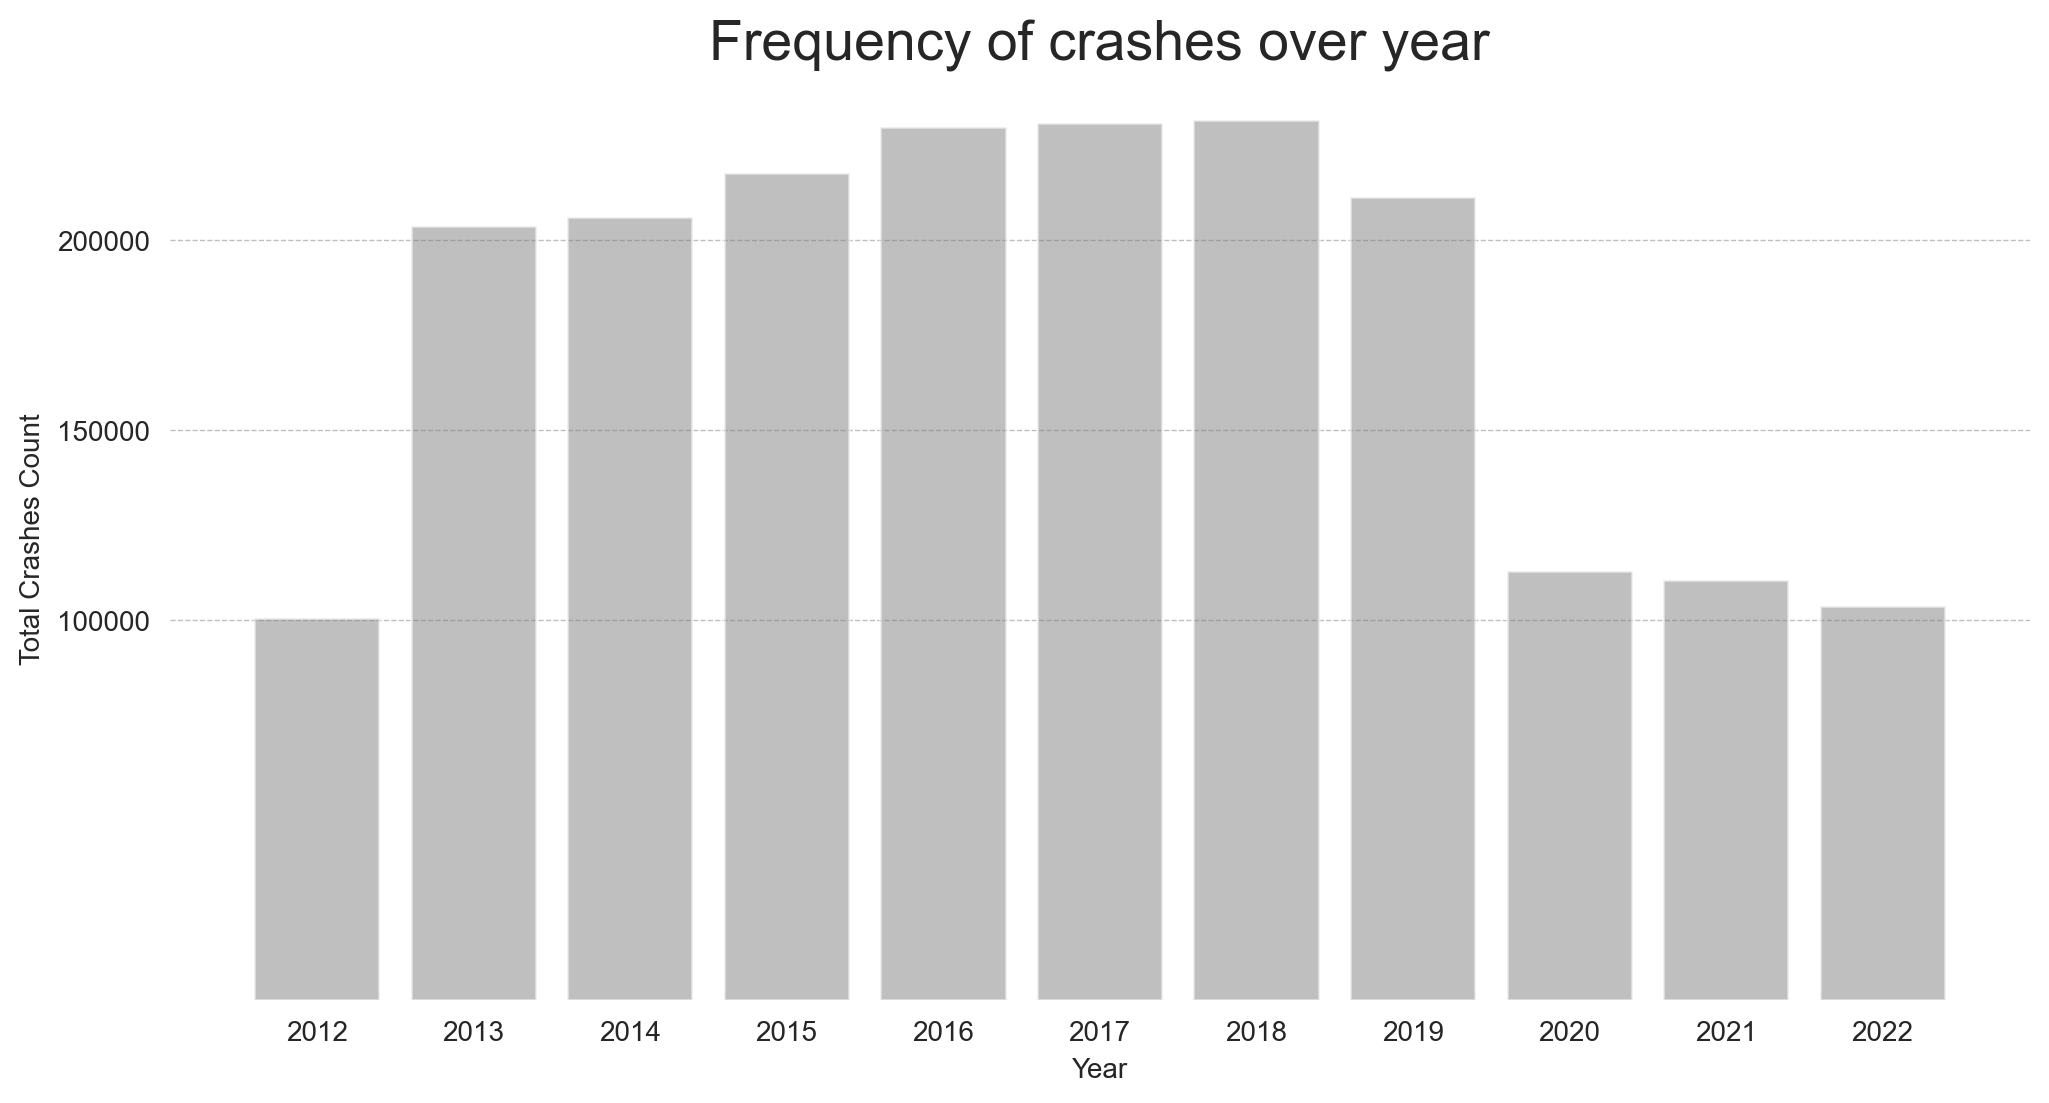

In [55]:
# Use full resolution of retina display
%config InlineBackend.figure_format = 'retina'

# use seaborn to set our graphing style. The style 'white' creates a white background for our graph
sns.set_style("white") 

# Assign x and y axes
x = crash_year_freq_time['Year']
y = crash_year_freq_time['count']

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(12, 6))

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Give the x and y values to the barplot
plt.bar(x_pos, y, align='center', color='grey', alpha=.5)

# Match the indeces with the correct crash category and assign them to the x-axis
plt.yticks(np.arange(round(min(y),-5), round(max(y),-5)+5000, 50000))
plt.xticks(x_pos, x)

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

# Give labels and titles
plt.ylabel("Total Crashes Count")
plt.xlabel("Year")
plt.title("Frequency of crashes over year",fontsize=20)

# Show the barplot
plt.show()

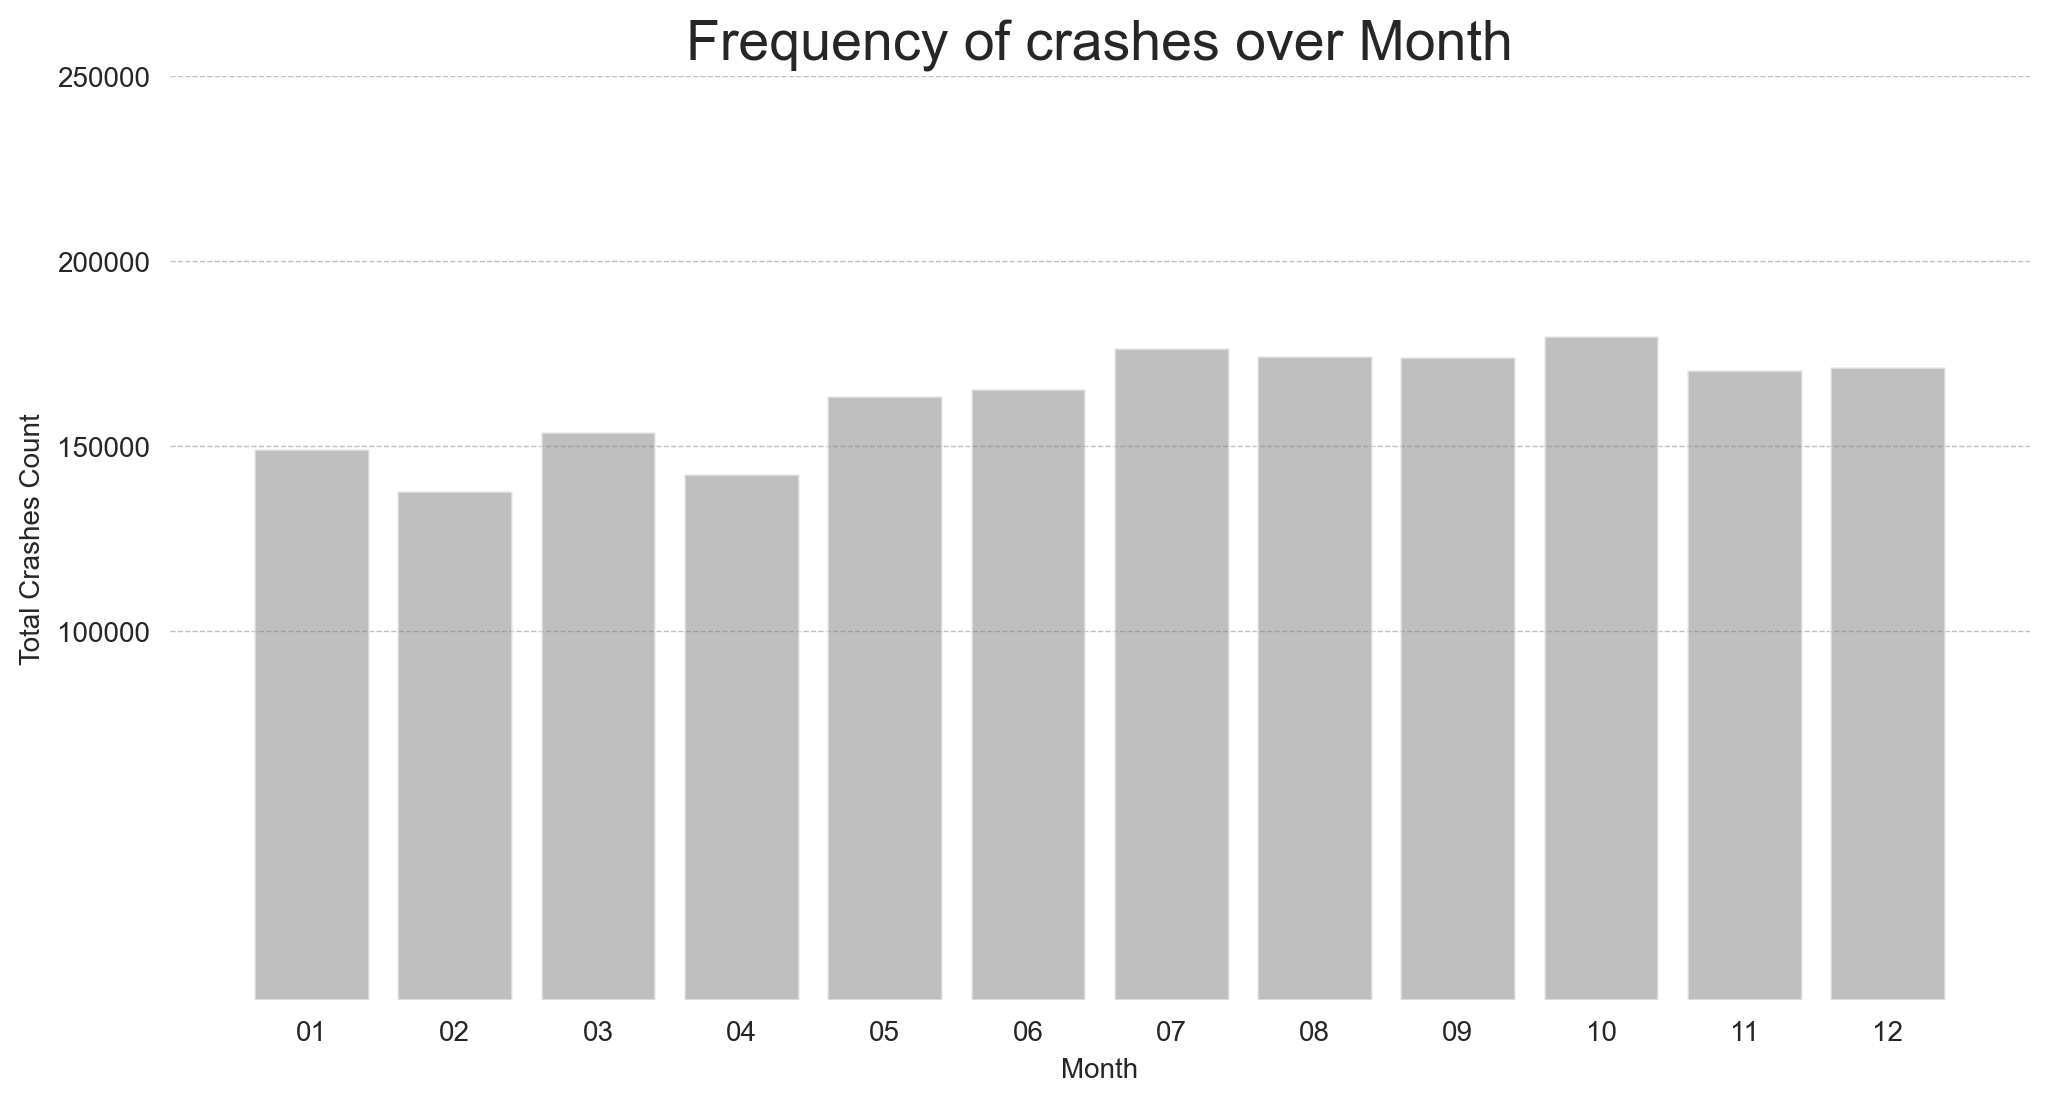

In [58]:
# Use full resolution of retina display
%config InlineBackend.figure_format = 'retina'

# use seaborn to set our graphing style. The style 'white' creates a white background for our graph
sns.set_style("white") 

# Assign x and y axes
x = crash_month_freq_time['Month']
y = crash_month_freq_time['count']

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(12, 6))

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Give the x and y values to the barplot
plt.bar(x_pos, y, align='center', color='grey', alpha=.5)

# Match the indeces with the correct crash category and assign them to the x-axis
plt.yticks(np.arange(round(min(y),-5), round(max(y),-5)+100000, 50000))
plt.xticks(x_pos, x)

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

# Give labels and titles
plt.ylabel("Total Crashes Count")
plt.xlabel("Month")
plt.title("Frequency of crashes over Month",fontsize=20)

# Show the barplot
plt.show()


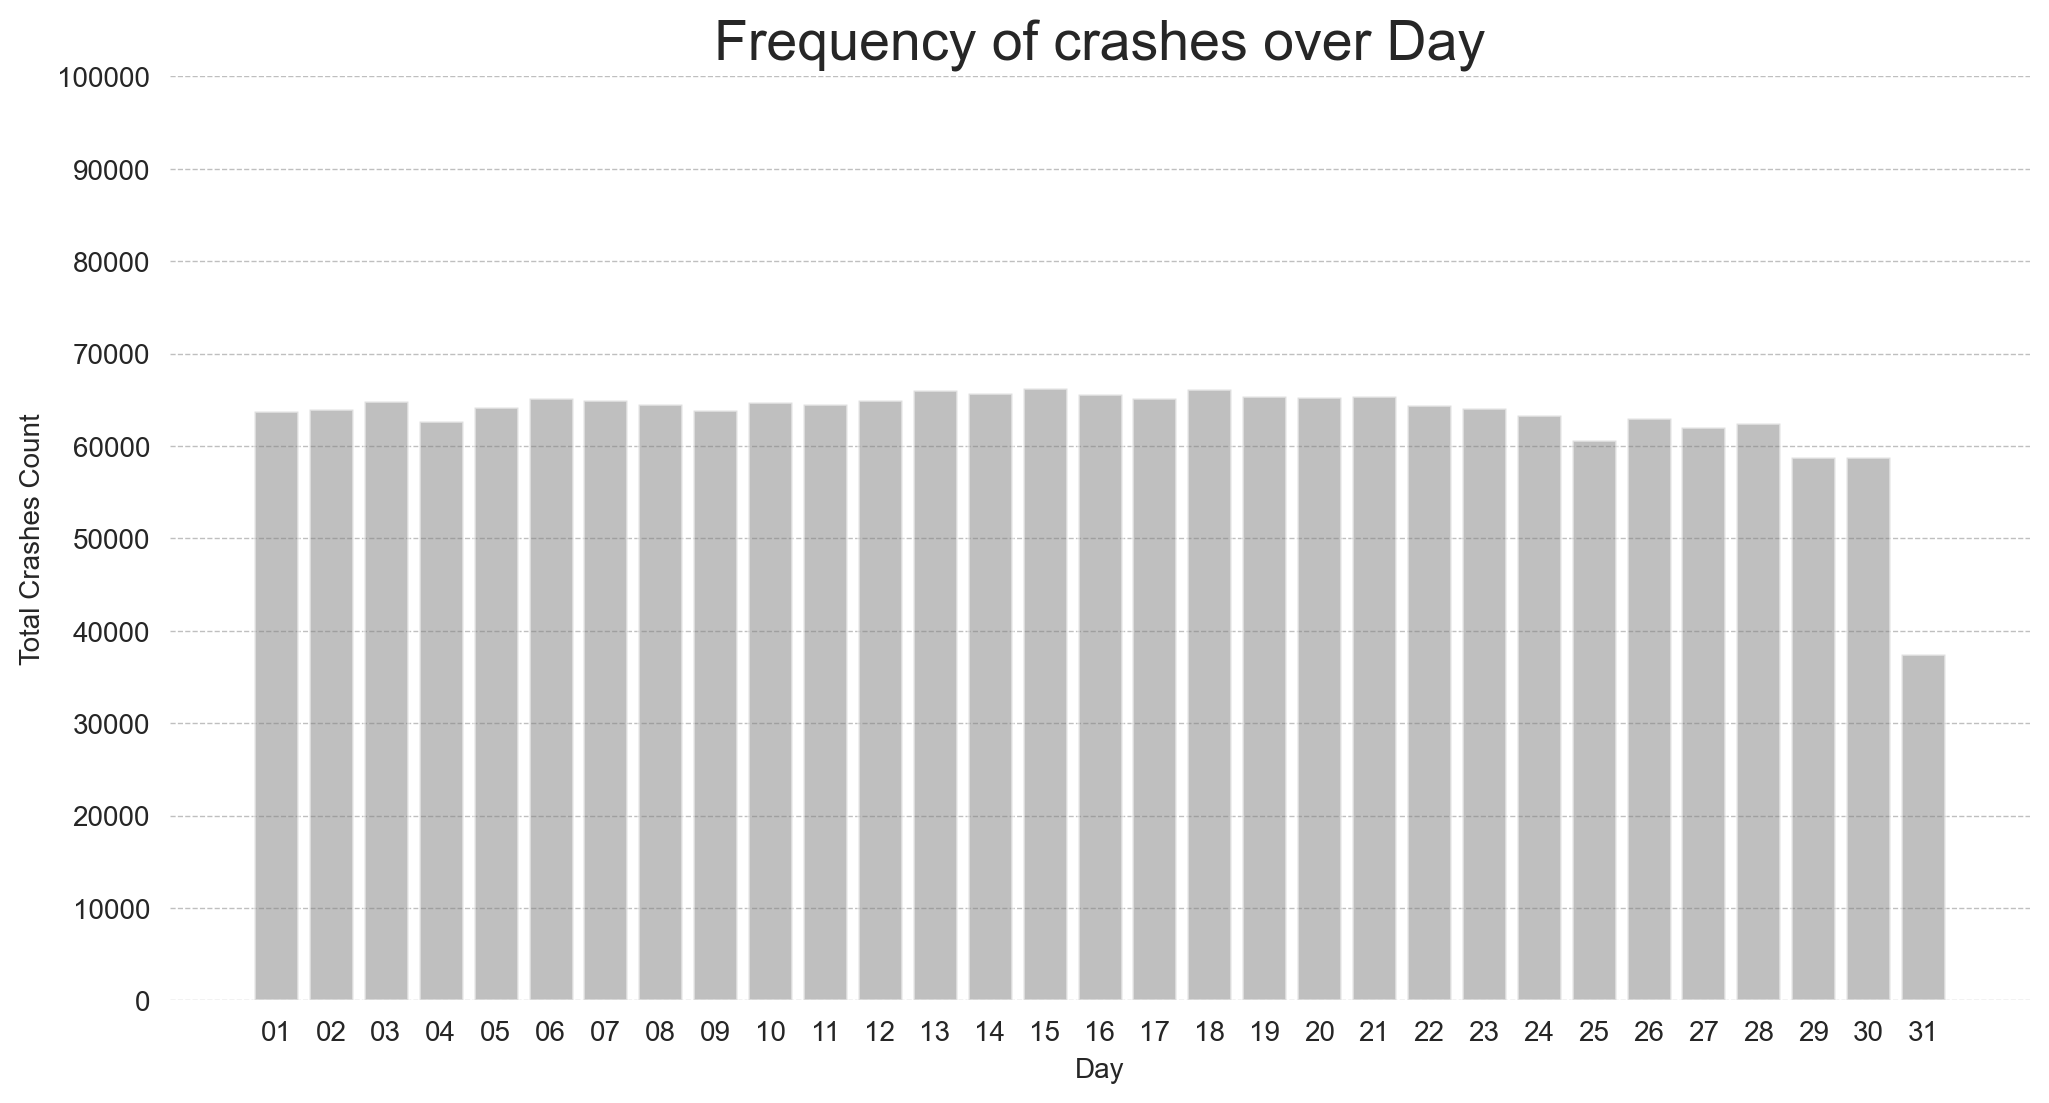

In [63]:
# Use full resolution of retina display
%config InlineBackend.figure_format = 'retina'

# use seaborn to set our graphing style. The style 'white' creates a white background for our graph
sns.set_style("white") 

# Assign x and y axes
x = crash_day_freq_time['Day']
y = crash_day_freq_time['count']

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(12, 6))

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Give the x and y values to the barplot
plt.bar(x_pos, y, align='center', color='grey', alpha=.5)

# Match the indeces with the correct crash category and assign them to the x-axis
plt.yticks(np.arange(round(min(y),-5), round(max(y),-5)+1000, 10000))
plt.xticks(x_pos, x)

# get rid of borders for our graph using seaborn's despine function
sns.despine(top=1, right=1, left=1, bottom=1)

# Give labels and titles
plt.ylabel("Total Crashes Count")
plt.xlabel("Day")
plt.title("Frequency of crashes over Day",fontsize=20)

# Show the barplot
plt.show()
